In [1]:
#loading
import pandas as pd
import numpy as np
from pandas import read_csv
from numpy import set_printoptions

#visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


import joblib

In [2]:
#read the data and bind the header
my_data = read_csv("crypto_historical_data1.csv")

In [3]:
my_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,symbol,name
0,2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550.0,314.248993,BTC,Bitcoin
1,2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650.0,315.032013,BTC,Bitcoin
2,2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400.0,281.082001,BTC,Bitcoin
3,2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100.0,264.195007,BTC,Bitcoin
4,2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800.0,274.473999,BTC,Bitcoin


In [4]:
my_data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,symbol,name
42564,2022-04-30,233.251205,213.535889,220.700958,214.662567,233614573.0,214.662567,XMR,Monero
42565,2022-05-01,227.330734,209.010468,214.691223,212.669113,211597053.0,212.669113,XMR,Monero
42566,2022-05-02,216.082428,196.676086,212.636810,198.667160,234496868.0,198.667160,XMR,Monero
42567,2022-05-03,215.341934,198.684174,198.684174,207.541031,212084119.0,207.541031,XMR,Monero
42568,2022-05-04,219.150452,206.787231,207.262314,212.799149,207282368.0,212.799149,XMR,Monero


In [5]:
print(my_data.shape)

(42569, 9)


In [6]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42569 entries, 0 to 42568
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       42569 non-null  object 
 1   High       42569 non-null  float64
 2   Low        42569 non-null  float64
 3   Open       42569 non-null  float64
 4   Close      42569 non-null  float64
 5   Volume     42569 non-null  float64
 6   Adj Close  42569 non-null  float64
 7   symbol     42569 non-null  object 
 8   name       42569 non-null  object 
dtypes: float64(6), object(3)
memory usage: 2.9+ MB


In [7]:
my_data['Date'] = pd.to_datetime(my_data['Date'])
print(my_data.dtypes)

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
symbol               object
name                 object
dtype: object


In [8]:
new_data = my_data.pivot(index='Date', columns=['name'], values='Close')  #index='Date',
new_data

name,Algorand,Avalanche,Binance Coin,Binance USD,Bitcoin,Bitcoin Cash,Cardano,Chainlink,Cosmos,Crypto.com,...,TRON,Terra,TerraUSD,Tether,UNUS SED LEO,USD Coin,Uniswap,Wrapped Bitcoin,Wrappped TRON,XRP
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,314.248993,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN,315.032013,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,281.082001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,264.195007,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,274.473999,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,NaN,57.048004,377.767822,0.999381,37714.875000,278.668884,0.756660,10.997047,17.880938,0.350410,...,0.062767,78.344093,0.999567,1.000155,5.666692,1.000295,6.771395,37657.300781,0.062860,0.587091
2022-05-01,NaN,58.856148,390.281982,1.001158,38469.093750,284.411987,0.790344,11.312018,18.026411,0.313454,...,0.070906,82.239548,1.001649,1.000113,5.556924,1.000381,7.124685,38467.000000,0.070880,0.607844
2022-05-02,NaN,60.517105,389.670654,0.999786,38529.328125,285.090942,0.781529,11.178780,17.813141,0.276152,...,0.068789,84.309166,1.001400,0.999955,5.742866,1.000060,6.934234,38607.609375,0.068612,0.614269


In [9]:
new_data= new_data.query("Date >='2021-01-01'")
new_data

name,Algorand,Avalanche,Binance Coin,Binance USD,Bitcoin,Bitcoin Cash,Cardano,Chainlink,Cosmos,Crypto.com,...,TRON,Terra,TerraUSD,Tether,UNUS SED LEO,USD Coin,Uniswap,Wrapped Bitcoin,Wrappped TRON,XRP
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.398129,3.664823,37.905010,1.000100,29374.152344,341.985657,0.175350,11.872555,5.868556,0.059587,...,0.026940,0.649443,1.001797,1.001916,1.356405,0.999823,4.736249,29349.441406,NaN,0.237444
2021-01-02,0.408091,3.494940,38.241592,0.999800,32127.267578,354.599945,0.177423,12.220137,5.414613,0.061818,...,0.027219,0.631426,0.999595,1.000600,1.356590,1.000162,4.845214,32164.800781,NaN,0.221655
2021-01-03,0.422767,3.472944,41.148979,0.999900,32782.023438,421.789856,0.204995,13.650172,5.813898,0.059763,...,0.029495,0.661895,0.998929,1.000514,1.352928,0.999736,5.447031,33008.128906,NaN,0.225848
2021-01-04,0.438666,3.590243,40.926353,0.999800,31971.914062,407.936920,0.224762,13.571063,5.996770,0.065431,...,0.030853,0.670244,1.003650,1.000128,1.348232,0.999372,5.406566,31950.109375,NaN,0.236677
2021-01-05,0.479429,4.237412,41.734600,1.000100,33992.429688,419.768127,0.258314,14.539868,6.216816,0.066348,...,0.028632,0.716674,0.992179,1.002202,1.350611,0.999749,6.279291,33968.238281,NaN,0.226750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,NaN,57.048004,377.767822,0.999381,37714.875000,278.668884,0.756660,10.997047,17.880938,0.350410,...,0.062767,78.344093,0.999567,1.000155,5.666692,1.000295,6.771395,37657.300781,0.062860,0.587091
2022-05-01,NaN,58.856148,390.281982,1.001158,38469.093750,284.411987,0.790344,11.312018,18.026411,0.313454,...,0.070906,82.239548,1.001649,1.000113,5.556924,1.000381,7.124685,38467.000000,0.070880,0.607844
2022-05-02,NaN,60.517105,389.670654,0.999786,38529.328125,285.090942,0.781529,11.178780,17.813141,0.276152,...,0.068789,84.309166,1.001400,0.999955,5.742866,1.000060,6.934234,38607.609375,0.068612,0.614269


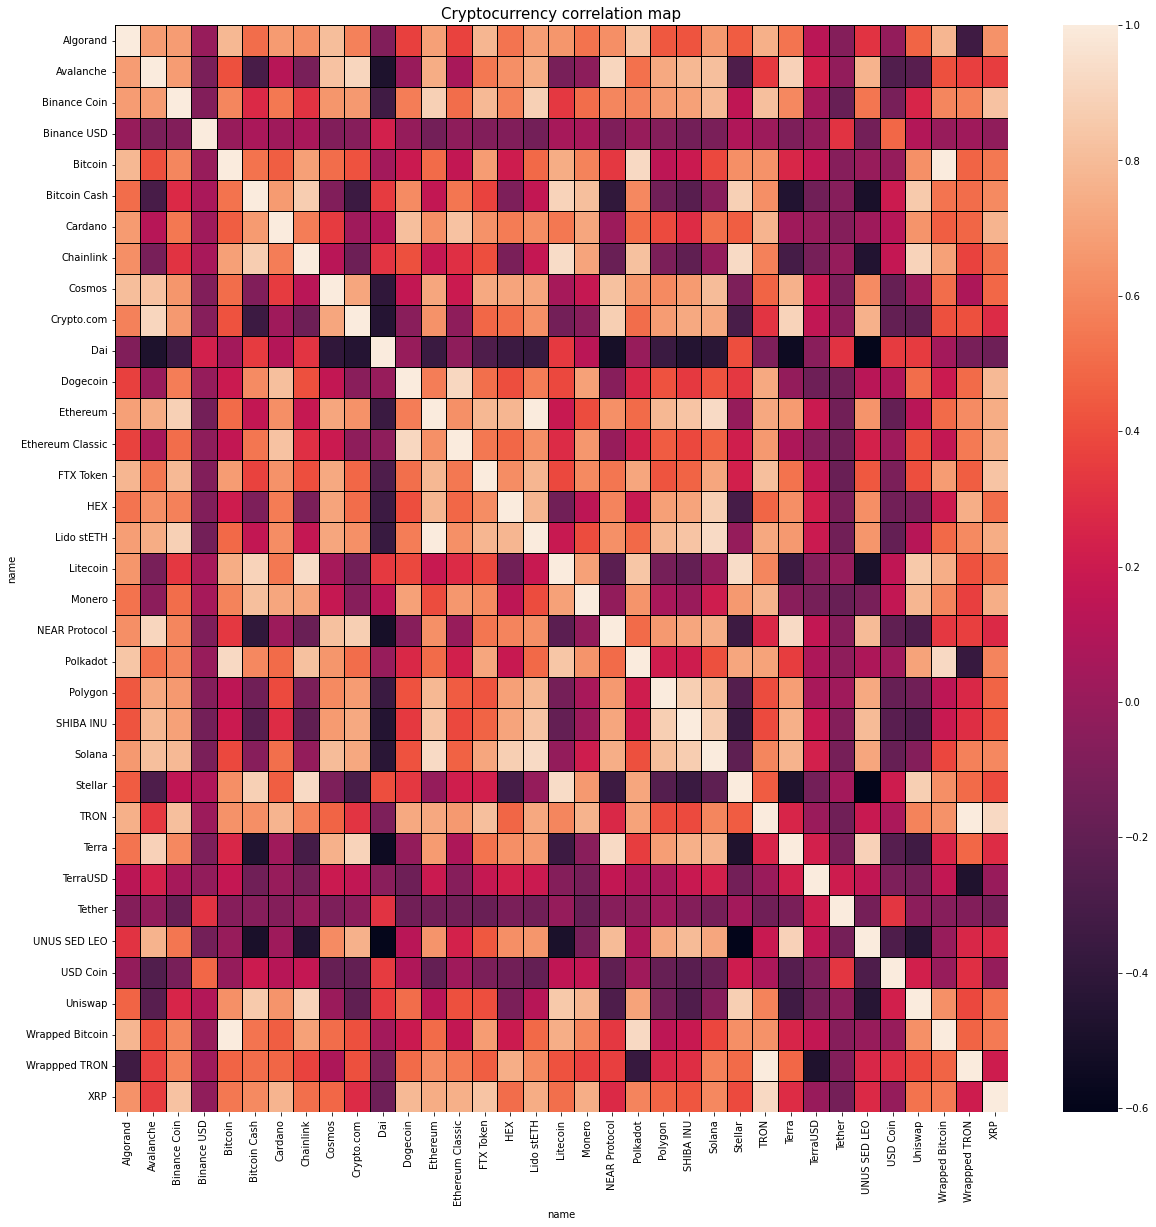

name,Algorand,Avalanche,Binance Coin,Binance USD,Bitcoin,Bitcoin Cash,Cardano,Chainlink,Cosmos,Crypto.com,...,TRON,Terra,TerraUSD,Tether,UNUS SED LEO,USD Coin,Uniswap,Wrapped Bitcoin,Wrappped TRON,XRP
name,,,,,,,,,,,,,,,,,,,,,
Algorand,1.000000,0.679260,0.677271,-0.001777,0.780532,0.507152,0.671371,0.623802,0.808350,0.573884,...,0.751225,0.535209,0.128783,-0.069739,0.314063,-0.013866,0.475758,0.777962,-0.337098,0.641319
Avalanche,0.679260,1.000000,0.676867,-0.109905,0.413910,-0.301468,0.120951,-0.113165,0.825097,0.911796,...,0.337103,0.892809,0.240543,-0.019188,0.763964,-0.261589,-0.238801,0.410451,0.359598,0.348543
Binance Coin,0.677271,0.676867,1.000000,-0.075972,0.597216,0.274086,0.543915,0.310382,0.652527,0.665322,...,0.817682,0.601710,0.055410,-0.175043,0.539664,-0.110689,0.256656,0.596103,0.576203,0.824477
Binance USD,-0.001777,-0.109905,-0.075972,1.000000,-0.001960,0.069667,0.033730,0.063698,-0.082052,-0.061357,...,0.015080,-0.096977,-0.019392,0.314517,-0.134535,0.489853,0.100005,-0.002144,0.029006,-0.023031
Bitcoin,0.780532,0.413910,0.597216,-0.001960,1.000000,0.528008,0.459016,0.692350,0.505442,0.417566,...,0.638646,0.260176,0.166666,-0.065391,-0.000939,-0.004176,0.630441,0.999738,0.479006,0.546972
Bitcoin Cash,0.507152,-0.301468,0.274086,0.069667,0.528008,1.000000,0.670088,0.872743,-0.082735,-0.353276,...,0.625635,-0.456130,-0.144914,-0.063206,-0.497808,0.200639,0.858069,0.530498,0.504495,0.608164
Cardano,0.671371,0.120951,0.543915,0.033730,0.459016,0.670088,1.000000,0.561512,0.346788,0.028819,...,0.770622,0.028516,0.000269,-0.068320,0.025592,0.115361,0.643314,0.458746,0.484135,0.771722
Chainlink,0.623802,-0.113165,0.310382,0.063698,0.692350,0.872743,0.561512,1.000000,0.125588,-0.157926,...,0.579051,-0.317220,-0.117754,-0.006759,-0.460755,0.165970,0.895383,0.695454,0.372131,0.511765
Cosmos,0.808350,0.825097,0.652527,-0.082052,0.505442,-0.082735,0.346788,0.125588,1.000000,0.716873,...,0.475600,0.757278,0.191391,-0.096200,0.613842,-0.182360,0.010784,0.505234,0.081861,0.486266


In [10]:
corrmat = new_data.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=1,linecolor='black', linewidths= 0.5)
plt.title("Cryptocurrency correlation map", fontsize=15)
plt.show()

new_data.corr(method='spearman')

In [36]:
new_data.describe()

name,Algorand,Avalanche,Binance Coin,Binance USD,Bitcoin,Bitcoin Cash,Cardano,Chainlink,Cosmos,Crypto.com,...,TRON,Terra,TerraUSD,Tether,UNUS SED LEO,USD Coin,Uniswap,Wrapped Bitcoin,Wrappped TRON,XRP
count,396.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,61.000000,489.000000
mean,1.216168,51.718379,386.859555,1.000136,45865.320448,536.287042,1.381073,24.081606,23.161507,0.268653,...,0.076257,37.817967,1.001417,1.000485,3.268248,1.000095,20.496503,45830.977046,0.064498,0.837425
std,0.445025,32.934313,147.856970,0.000800,8993.174701,202.722383,0.576433,7.761035,9.178846,0.174451,...,0.026384,31.939720,0.004981,0.000739,1.399333,0.000694,8.708046,8963.170498,0.004717,0.308380
min,0.397690,3.472944,37.905010,0.998101,29374.152344,274.935089,0.175350,10.997047,5.414613,0.059587,...,0.026940,0.631426,0.945692,0.998964,1.302555,0.997912,4.736249,29349.441406,0.058221,0.221655
25%,0.855951,20.243713,313.602600,0.999839,38609.824219,399.769928,1.052303,17.426189,15.086408,0.129889,...,0.059964,7.895117,1.000048,1.000149,2.308401,0.999839,11.805107,38607.609375,0.060861,0.619149
50%,1.142045,47.509106,399.105377,1.000093,44801.187500,513.339233,1.275501,24.493073,23.097263,0.190242,...,0.069382,31.562357,1.001088,1.000362,2.977209,1.000039,20.771873,44807.082031,0.063065,0.806121
75%,1.573189,78.557648,485.111023,1.000367,52633.535156,621.694336,1.678248,28.461523,29.481501,0.409419,...,0.093627,60.930698,1.002428,1.000636,3.647843,1.000255,26.419477,52565.640625,0.067667,1.058820
max,2.379480,134.531036,675.684082,1.010413,67566.828125,1542.425049,2.968239,52.198696,44.542789,0.900518,...,0.164650,116.408920,1.042085,1.011530,7.500967,1.010496,43.164505,67549.226562,0.076650,1.839236


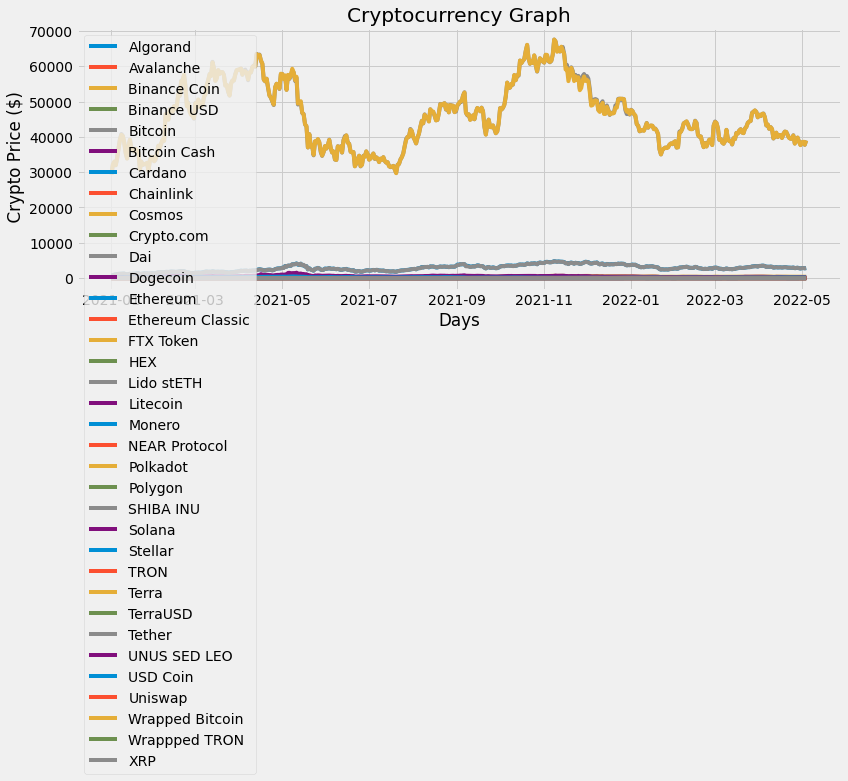

In [37]:
plt.style.use('fivethirtyeight')
my_crypto = new_data
plt.figure(figsize = (12.2, 4.5))
for c in my_crypto.columns.values:
   plt.plot(my_crypto[c], label = c)
plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel(' Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')
plt.show()

In [38]:
df_return = new_data.apply(lambda x: x / x[0])
df_return.head()

name,Algorand,Avalanche,Binance Coin,Binance USD,Bitcoin,Bitcoin Cash,Cardano,Chainlink,Cosmos,Crypto.com,...,TRON,Terra,TerraUSD,Tether,UNUS SED LEO,USD Coin,Uniswap,Wrapped Bitcoin,Wrappped TRON,XRP
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000
2021-01-02,1.025022,0.953645,1.008880,0.9997,1.093726,1.036885,1.011822,1.029276,0.922648,1.037441,...,1.010356,0.972258,0.997802,0.998686,1.000136,1.000339,1.023007,1.095925,NaN,0.933504
2021-01-03,1.061885,0.947643,1.085582,0.9998,1.116016,1.233355,1.169062,1.149725,0.990686,1.002954,...,1.094840,1.019173,0.997137,0.998601,0.997437,0.999913,1.150073,1.124660,NaN,0.951163
2021-01-04,1.101819,0.979650,1.079708,0.9997,1.088437,1.192848,1.281791,1.143062,1.021848,1.098075,...,1.145249,1.032029,1.001850,0.998215,0.993975,0.999549,1.141529,1.088610,NaN,0.996770
2021-01-05,1.204205,1.156239,1.101031,1.0000,1.157222,1.227444,1.473134,1.224662,1.059343,1.113464,...,1.062806,1.103521,0.990399,1.000285,0.995728,0.999926,1.325794,1.157373,NaN,0.954962


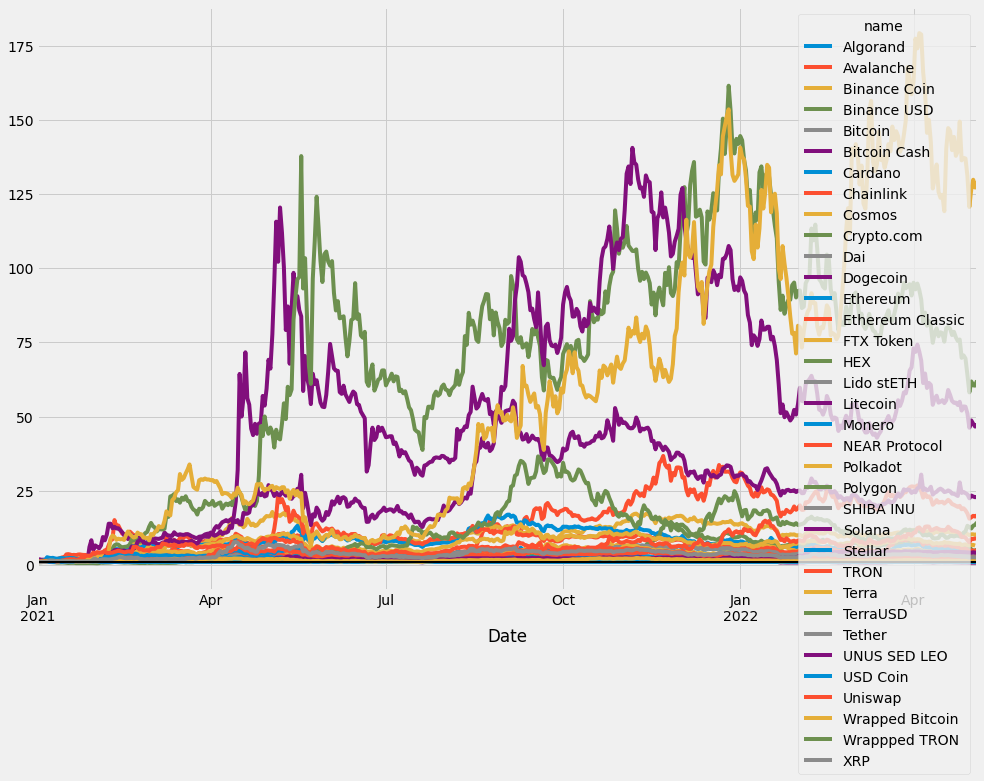

In [39]:
#visualise returns
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)

name,Algorand,Avalanche,Binance Coin,Binance USD,Bitcoin,Bitcoin Cash,Cardano,Chainlink,Cosmos,Crypto.com,...,TRON,Terra,TerraUSD,Tether,UNUS SED LEO,USD Coin,Uniswap,Wrapped Bitcoin,Wrappped TRON,XRP
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-04,166.053097,1669.872494,1032.464821,100.106527,132.685757,83.958057,474.151681,95.11962,315.015291,508.527174,...,285.126757,12922.155042,99.770493,99.813628,413.339474,100.02548,154.301638,132.797792,NaN,259.203895


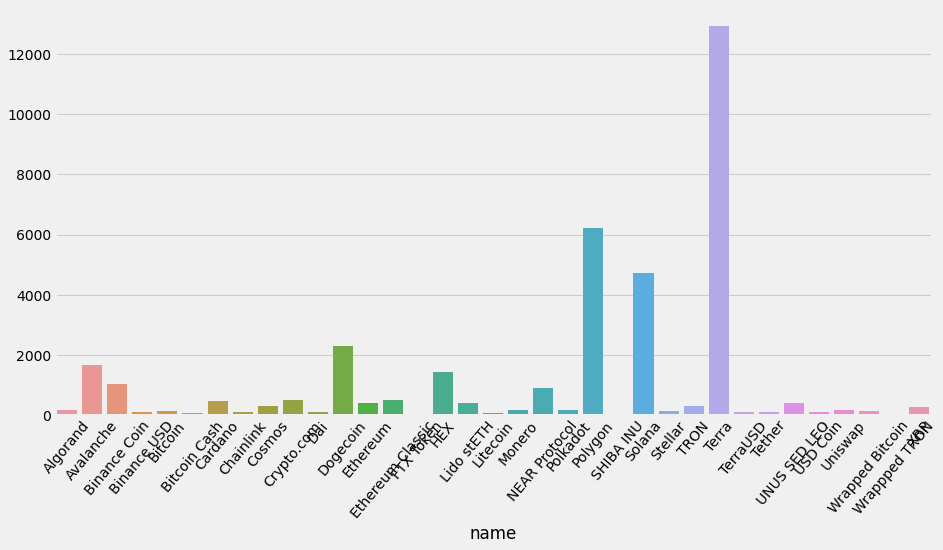

In [40]:
#what is the percentage increase
df_perc = df_return.tail(1) * 100
plt.figure(figsize=(14,7))
ax = sns.barplot(data=df_perc)
plt.xticks(rotation=50)
df_perc

name,Algorand,Avalanche,Binance Coin,Binance USD,Bitcoin,Bitcoin Cash,Cardano,Chainlink,Cosmos,Crypto.com,...,TRON,Terra,TerraUSD,Tether,UNUS SED LEO,USD Coin,Uniswap,Wrapped Bitcoin,Wrappped TRON,XRP
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,2511.748791,272.86447,26.381737,999.899993,0.034044,2.924099,5702.880101,84.22787,170.399668,16782.183526,...,37119.525818,1539.781082,998.206262,998.087613,737.242922,1000.177057,211.137549,0.034072,NaN,4211.519375


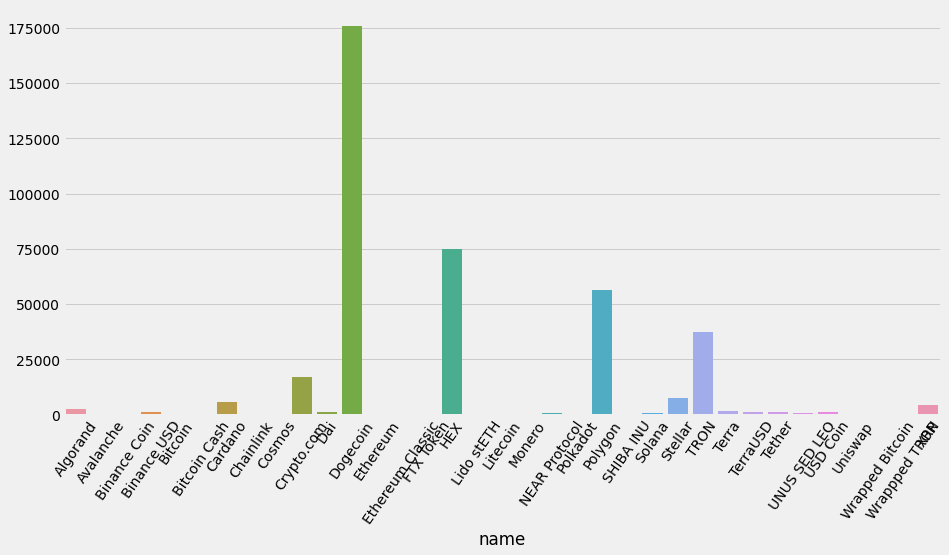

In [42]:
#how many coins are we going to buy for $1000
budget = 1000 # USD
df_coins = budget/new_data.head(1)
plt.figure(figsize=(14,7))
ax = sns.barplot(data=df_coins)
plt.xticks(rotation=55)
df_coins

name,Algorand,Avalanche,Binance Coin,Binance USD,Bitcoin,Bitcoin Cash,Cardano,Chainlink,Cosmos,Crypto.com,...,TRON,Terra,TerraUSD,Tether,UNUS SED LEO,USD Coin,Uniswap,Wrapped Bitcoin,Wrappped TRON,XRP
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-04,1660.530974,16698.724942,10324.648211,1001.065267,1326.85757,839.580567,4741.516812,951.196198,3150.15291,5085.27174,...,2851.267574,129221.550417,997.704935,998.136277,4133.394736,1000.254795,1543.016384,1327.97792,NaN,2592.038945


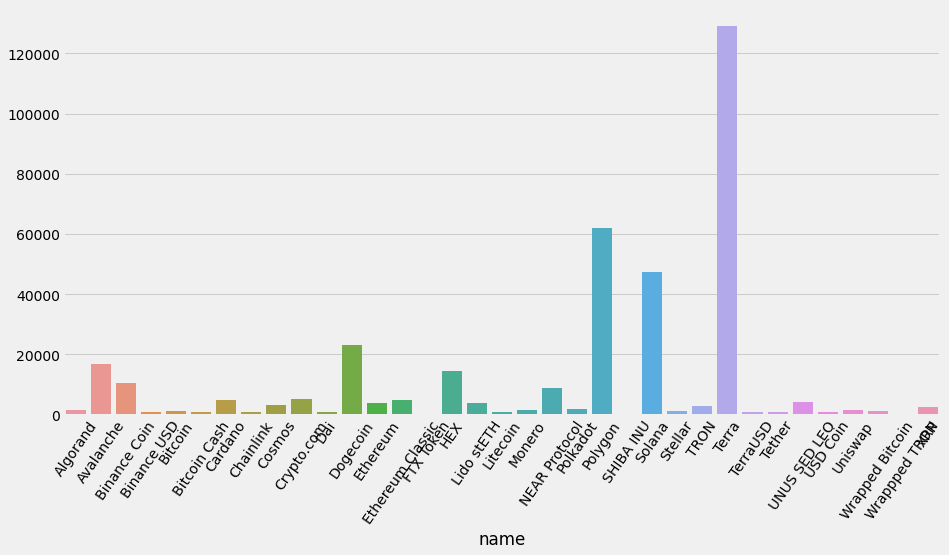

In [43]:
#how much money would you make
df_profit = df_return.tail(1) * budget
plt.figure(figsize=(14,7))
ax = sns.barplot(data=df_profit)
plt.xticks(rotation=55)
df_profit

In [44]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(new_data)
scaled

array([[2.21510974e-02, 1.46407620e-01, 0.00000000e+00, ...,
        0.00000000e+00,            nan, 9.76087252e-01],
       [5.24829125e-01, 1.67834133e-02, 5.27741029e-02, ...,
        7.37009217e+00,            nan, 0.00000000e+00],
       [1.26537204e+00, 0.00000000e+00, 5.08635217e-01, ...,
        9.57776984e+00,            nan, 2.59214709e-01],
       ...,
       [           nan, 4.35258595e+01, 5.51547800e+01, ...,
        2.42361781e+01, 5.63829609e+01, 2.42716758e+01],
       [           nan, 4.28719521e+01, 5.41834633e+01, ...,
        2.20419474e+01, 7.49566058e+01, 2.36893224e+01],
       [1.32917983e+01, 4.40452986e+01, 5.54190160e+01, ...,
        2.51990128e+01, 1.00000000e+02, 2.43455560e+01]])

In [45]:
#convert the scaled data to a dataframe
df_scale = pd.DataFrame(scaled, columns = new_data.columns)

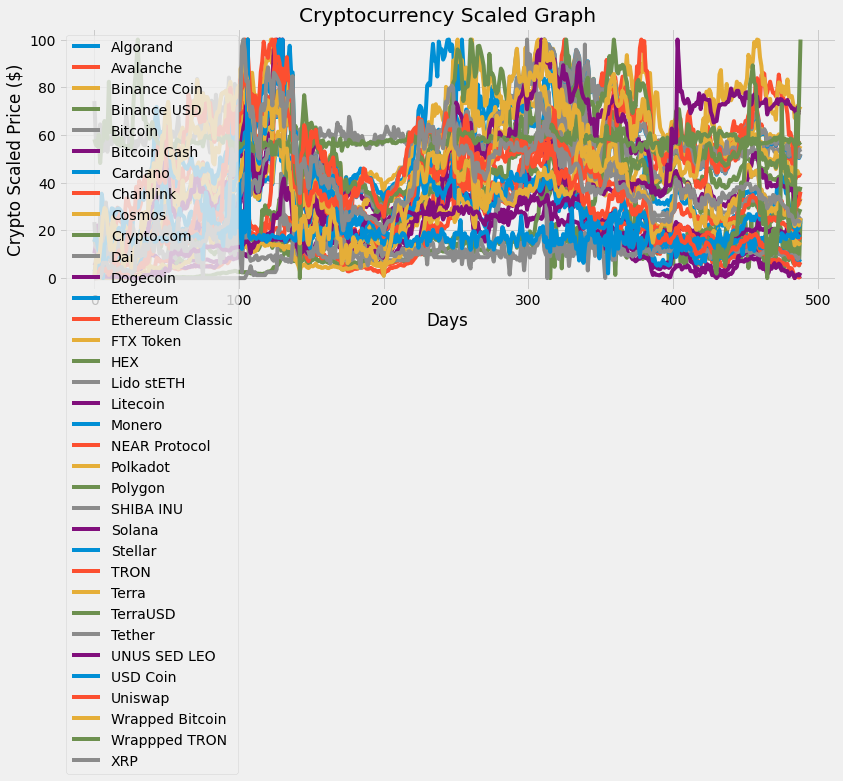

In [46]:
#Visualize the scaled data
my_crypto = df_scale
plt.figure(figsize=(12.4, 4.5))
for c in my_crypto.columns.values:
   plt.plot(my_crypto[c], label=c)
plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price ($)')
plt.legend(my_crypto.columns.values, loc = 'upper left')
plt.show()

In [47]:
DSR = new_data.pct_change(1)
DSR

name,Algorand,Avalanche,Binance Coin,Binance USD,Bitcoin,Bitcoin Cash,Cardano,Chainlink,Cosmos,Crypto.com,...,TRON,Terra,TerraUSD,Tether,UNUS SED LEO,USD Coin,Uniswap,Wrapped Bitcoin,Wrappped TRON,XRP
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,0.025022,-0.046355,0.008880,-0.000300,0.093726,0.036885,0.011822,0.029276,-0.077352,0.037441,...,0.010356,-0.027742,-0.002198,-0.001314,0.000136,0.000339,0.023007,0.095925,NaN,-0.066496
2021-01-03,0.035963,-0.006294,0.076027,0.000100,0.020380,0.189481,0.155403,0.117023,0.073742,-0.033243,...,0.083618,0.048254,-0.000666,-0.000086,-0.002699,-0.000426,0.124209,0.026219,NaN,0.018917
2021-01-04,0.037607,0.033775,-0.005410,-0.000100,-0.024712,-0.032843,0.096427,-0.005795,0.031454,0.094841,...,0.046042,0.012614,0.004726,-0.000386,-0.003471,-0.000364,-0.007429,-0.032053,NaN,0.047948
2021-01-05,0.092925,0.180258,0.019749,0.000300,0.063197,0.029003,0.149278,0.071388,0.036694,0.014015,...,-0.071986,0.069273,-0.011429,0.002074,0.001764,0.000377,0.161419,0.063165,NaN,-0.041943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,0.000000,-0.100432,-0.038911,0.000509,-0.023179,-0.054428,-0.060100,-0.081303,-0.082077,-0.053000,...,-0.012072,-0.079564,-0.001406,0.000135,-0.007655,0.000272,-0.111358,-0.023621,-0.011324,-0.039770
2022-05-01,0.000000,0.031695,0.033127,0.001778,0.019998,0.020609,0.044517,0.028641,0.008136,-0.105465,...,0.129670,0.049722,0.002083,-0.000042,-0.019371,0.000086,0.052174,0.021502,0.127585,0.035349
2022-05-02,0.000000,0.028221,-0.001566,-0.001370,0.001566,0.002387,-0.011153,-0.011779,-0.011831,-0.119003,...,-0.029856,0.025166,-0.000249,-0.000158,0.033461,-0.000321,-0.026731,0.003655,-0.031998,0.010570


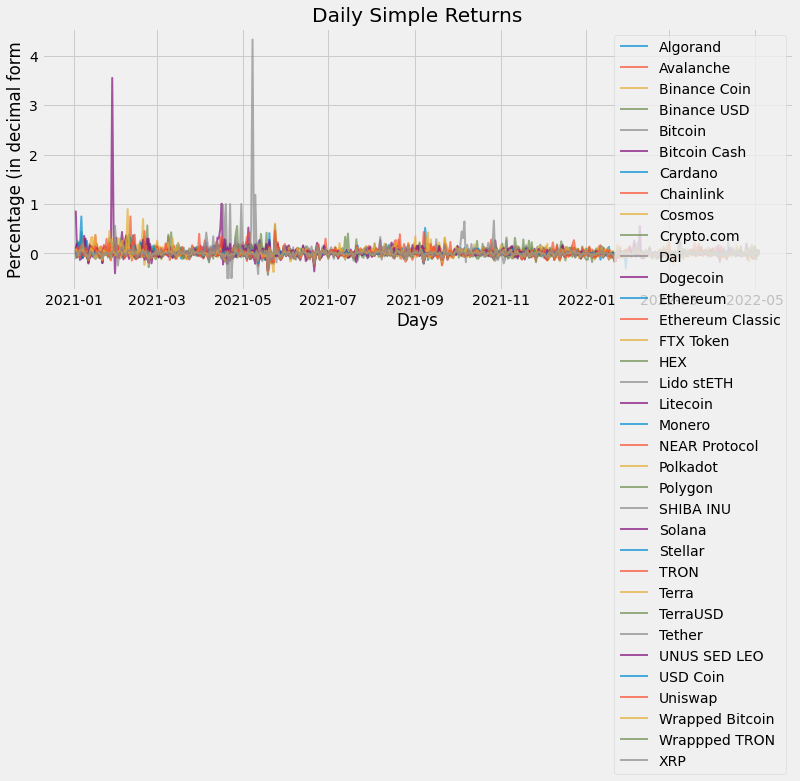

In [54]:
plt.figure(figsize=(12, 4.5))
for c in DSR.columns.values:
   plt.plot(DSR.index, DSR[c], label = c, lw = 2, alpha = .7)
plt.title('Daily Simple Returns')
plt.ylabel('Percentage (in decimal form')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc= 'upper right')
plt.show()

In [55]:
print('The cryptocurrency volatility:')
DSR.std()

The cryptocurrency volatility:


name
Algorand            0.068315
Avalanche           0.089092
Binance Coin        0.069427
Binance USD         0.001027
Bitcoin             0.039982
Bitcoin Cash        0.063629
Cardano             0.063954
Chainlink           0.067519
Cosmos              0.078057
Crypto.com          0.069363
Dai                 0.002017
Dogecoin            0.192081
Ethereum            0.052215
Ethereum Classic    0.075311
FTX Token           0.058556
HEX                 0.078418
Lido stETH          0.052081
Litecoin            0.056430
Monero              0.059508
NEAR Protocol       0.083821
Polkadot            0.069792
Polygon             0.095294
SHIBA INU                NaN
Solana              0.078349
Stellar             0.066871
TRON                0.059806
Terra               0.100514
TerraUSD            0.003929
Tether              0.000889
UNUS SED LEO        0.048550
USD Coin            0.000855
Uniswap             0.071624
Wrapped Bitcoin     0.039932
Wrappped TRON       0.037951
XRP      

In [56]:
DSR.mean()

name
Algorand            3.309930e-03
Avalanche           9.474026e-03
Binance Coin        7.024055e-03
Binance USD         2.708183e-06
Bitcoin             1.374635e-03
Bitcoin Cash        1.606610e-03
Cardano             5.172706e-03
Chainlink           2.204018e-03
Cosmos              5.373464e-03
Crypto.com          5.633453e-03
Dai                -7.793805e-06
Dogecoin            1.534739e-02
Ethereum            4.155150e-03
Ethereum Classic    5.944704e-03
FTX Token           5.523751e-03
HEX                 8.425278e-03
Lido stETH          4.167129e-03
Litecoin            1.211181e-03
Monero              2.705635e-03
NEAR Protocol       7.876151e-03
Polkadot            3.642126e-03
Polygon             1.258842e-02
SHIBA INU                    inf
Solana              1.094294e-02
Stellar             2.649072e-03
TRON                3.907145e-03
Terra               1.457435e-02
TerraUSD            2.993083e-06
Tether             -3.427420e-06
UNUS SED LEO        3.980891e-03
USD C

In [57]:
DSR.corr()

name,Algorand,Avalanche,Binance Coin,Binance USD,Bitcoin,Bitcoin Cash,Cardano,Chainlink,Cosmos,Crypto.com,...,TRON,Terra,TerraUSD,Tether,UNUS SED LEO,USD Coin,Uniswap,Wrapped Bitcoin,Wrappped TRON,XRP
name,,,,,,,,,,,,,,,,,,,,,
Algorand,1.000000,0.405804,0.443778,0.044804,0.526507,0.516002,0.495280,0.605322,0.564440,0.423830,...,0.556968,0.357332,0.134609,0.083625,0.014822,0.018706,0.459125,0.529265,0.108862,0.445707
Avalanche,0.405804,1.000000,0.494416,0.037500,0.489787,0.466118,0.610716,0.495186,0.523923,0.430012,...,0.434533,0.439062,0.185991,0.062073,0.052498,0.060051,0.447523,0.488494,0.426399,0.443336
Binance Coin,0.443778,0.494416,1.000000,0.021524,0.614059,0.546621,0.518147,0.590412,0.470637,0.497463,...,0.551613,0.407828,0.167680,0.020023,0.102085,0.012680,0.479215,0.617185,0.453474,0.491976
Binance USD,0.044804,0.037500,0.021524,1.000000,-0.007303,-0.041999,0.016769,0.000955,0.059911,0.028637,...,-0.041461,0.025845,0.192194,0.676625,0.032378,0.717929,-0.026956,-0.011486,0.141293,-0.055707
Bitcoin,0.526507,0.489787,0.614059,-0.007303,1.000000,0.704031,0.600648,0.689575,0.533565,0.604556,...,0.640298,0.505083,0.165163,-0.019666,0.092731,-0.042423,0.573792,0.995609,0.439911,0.559590
Bitcoin Cash,0.516002,0.466118,0.546621,-0.041999,0.704031,1.000000,0.591145,0.715093,0.550827,0.516847,...,0.688773,0.393434,0.169473,-0.023843,0.077837,-0.053994,0.535526,0.709090,0.372579,0.583355
Cardano,0.495280,0.610716,0.518147,0.016769,0.600648,0.591145,1.000000,0.643342,0.565757,0.480308,...,0.562158,0.378209,0.118652,0.032364,0.064814,-0.016624,0.601466,0.598763,0.489337,0.492576
Chainlink,0.605322,0.495186,0.590412,0.000955,0.689575,0.715093,0.643342,1.000000,0.646366,0.553045,...,0.644799,0.423162,0.207837,0.003571,0.019863,-0.039001,0.670876,0.686093,0.486994,0.569811
Cosmos,0.564440,0.523923,0.470637,0.059911,0.533565,0.550827,0.565757,0.646366,1.000000,0.455884,...,0.536137,0.447070,0.140095,0.069543,0.072634,0.022299,0.508803,0.533493,0.418860,0.445491


<AxesSubplot:xlabel='name', ylabel='name'>

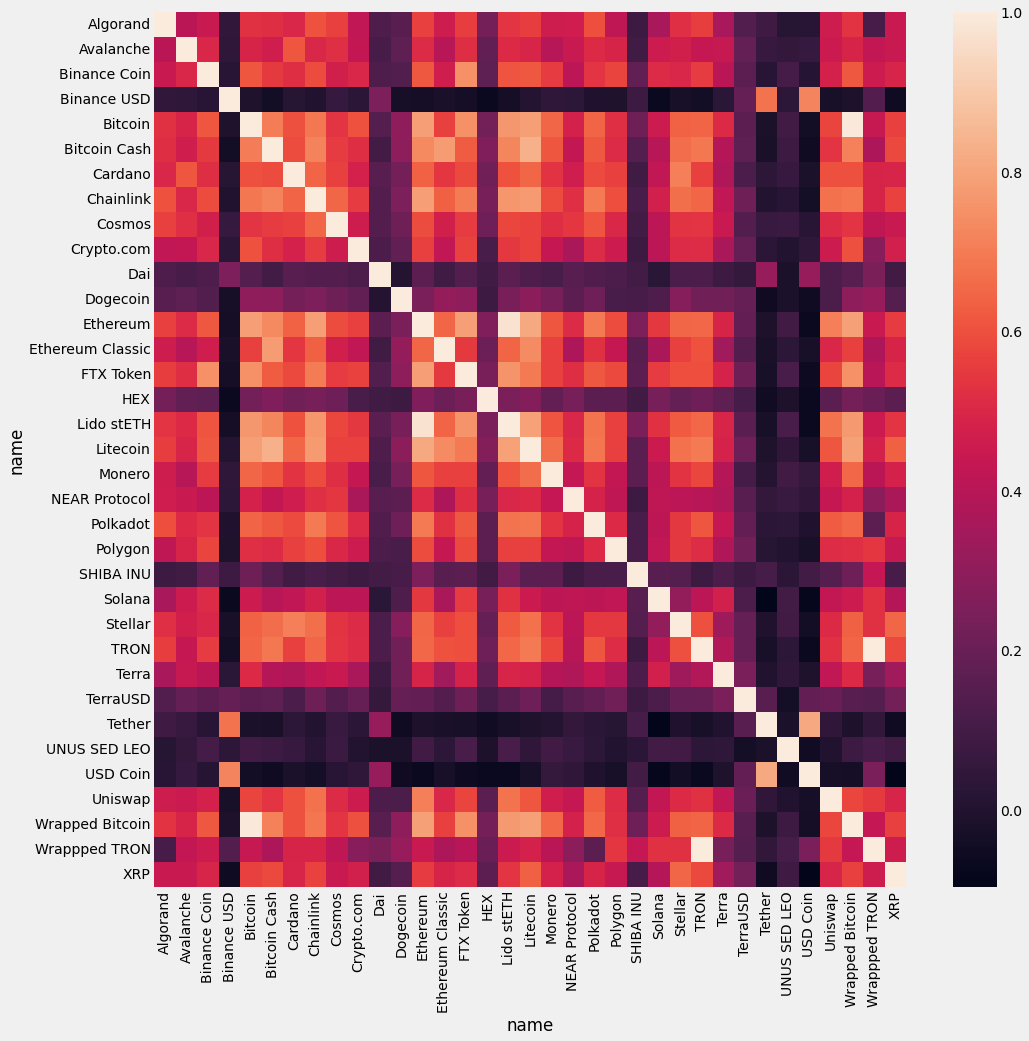

In [60]:
plt.subplots(figsize= (15,15))
sns.heatmap(DSR.corr(), fmt= '.2%')

In [53]:
DCSR = (DSR+1).cumprod()
DCSR

name,Algorand,Avalanche,Binance Coin,Binance USD,Bitcoin,Bitcoin Cash,Cardano,Chainlink,Cosmos,Crypto.com,...,TRON,Terra,TerraUSD,Tether,UNUS SED LEO,USD Coin,Uniswap,Wrapped Bitcoin,Wrappped TRON,XRP
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,1.025022,0.953645,1.008880,0.999700,1.093726,1.036885,1.011822,1.029276,0.922648,1.037441,...,1.010356,0.972258,0.997802,0.998686,1.000136,1.000339,1.023007,1.095925,NaN,0.933504
2021-01-03,1.061885,0.947643,1.085582,0.999800,1.116016,1.233355,1.169062,1.149725,0.990686,1.002954,...,1.094840,1.019173,0.997137,0.998601,0.997437,0.999913,1.150073,1.124660,NaN,0.951163
2021-01-04,1.101819,0.979650,1.079708,0.999700,1.088437,1.192848,1.281791,1.143062,1.021848,1.098075,...,1.145249,1.032029,1.001850,0.998215,0.993975,0.999549,1.141529,1.088610,NaN,0.996770
2021-01-05,1.204205,1.156239,1.101031,1.000000,1.157222,1.227444,1.473134,1.224662,1.059343,1.113464,...,1.062806,1.103521,0.990399,1.000285,0.995728,0.999926,1.325794,1.157373,NaN,0.954962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,1.599462,15.566373,9.966171,0.999281,1.283948,0.814855,4.315141,0.926258,3.046906,5.880645,...,2.329881,120.632753,0.997774,0.998242,4.177728,1.000472,1.429696,1.283067,1.040797,2.472545
2022-05-01,1.599462,16.059752,10.296317,1.001058,1.309624,0.831649,4.507237,0.952787,3.071694,5.260443,...,2.631997,126.630900,0.999852,0.998200,4.096803,1.000558,1.504288,1.310655,1.173588,2.559947
2022-05-02,1.599462,16.512968,10.280189,0.999686,1.311675,0.833634,4.456966,0.941565,3.035353,4.634434,...,2.553415,129.817659,0.999604,0.998043,4.233887,1.000237,1.464077,1.315446,1.136036,2.587006


In [1]:
plt.figure(figsize=(12.2, 4.5))
for c in DCSR.columns.values:
  plt.plot(DCSR.index, DCSR[c], lw=2, label= c)
plt.title('Daily Cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of $1 investment')
plt.legend(DCSR.columns.values, loc = 'upper left', fontsize = 10)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
def find_profit(data, times, forecast, profit, currency):
  current_value = data[currency]['Close'][-1]
  df_ = pd.DataFrame(columns=["Currency", "Date", "Expected Profit"])
  for i in range(len(forecast)):
    if (forecast[i]-current_value) >= profit:
      df_.loc[len(df_.index)] = [currency, times[i], forecast[i]-current_value]
  return df_, current_value